In [41]:
filename = "crawldata/hr21.tld_hr.good.lang_English.part01.prevert"

from bs4 import BeautifulSoup 

# Reading the data inside the xml file to a variable under the name  data
with open(filename, 'r') as f:
    # Note the prefix and suffix:
    # Without it only the first document is read.
    filecontent = "<data>" + f.read() + "</data>"

# Passing the stored data inside the beautifulsoup parser 
data = BeautifulSoup(filecontent, 'xml', )


In [3]:
docs = data.find_all("doc")
len(docs)

713634

In [4]:
parsed_docs = list()

for doc in docs:
    doc_id = doc["id"]
    paragraphs = doc.find_all("p")
    paragraphs = [p.contents[0].replace("\n", " ") for p in paragraphs]
    paragraphs = "   ".join(paragraphs)
    parsed_docs.append({
        "id": doc_id,
        "text": paragraphs
    })


In [5]:
import pandas as pd
df = pd.DataFrame(data=parsed_docs)

In [32]:
from utils import get_lexicon, preprocess, count_variants
import logging
logging.basicConfig(format='%(asctime)s %(message)s', level=logging.WARNING)


lex = get_lexicon(min_length=3, only_verified=True)

df["variant_detector_count"] = df.text.apply(lambda s: count_variants(s, lex)[0])
df["variant_detector_breakdown"] = df.text.apply(lambda s: count_variants(s, lex)[1])
df["words"] = df.text.apply(lambda t: len(t.split()))
df["A_B"] = df.variant_detector_count.apply(lambda d:d.get("A", 0) - d.get("B", 0))
df["A_B_normalized"] = df.A_B / df.words


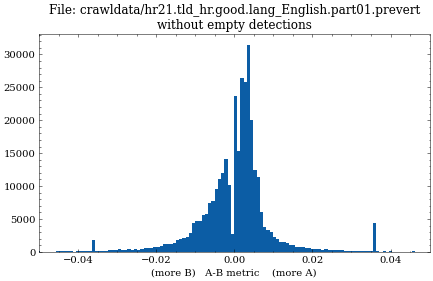

In [45]:
import matplotlib.pyplot as plt
plt.style.use("science no-latex".split())
plt.figure(figsize=(7,4))
plt.hist(df.A_B_normalized[df.variant_detector_count != {}], bins=400)
plt.xlim((-0.05, 0.05))
plt.title(f"File: {filename}\nwithout empty detections")

plt.xlabel("(more B)   A-B metric    (more A)")
plt.savefig("images/A_B_normalized_hr_part01.png")
plt.show()

In [34]:
sum(df.A_B == 0)/df.shape[0]

0.5598766314385245

In [35]:
sum(df.variant_detector_count == {})/df.shape[0]

0.5302185714245677

In [72]:
pd.set_option('max_colwidth', 100)
df.loc[:, ["variant_detector_breakdown", "text"]].sample(5)


,variant_detector_breakdown,text
85303,"{'centers': {'variant': 'A', 'count': 1}, 'catalysing': {'variant': 'B', 'count': 1}, 'analyses'...",SVIBOR - Collecting Data on Projects in Croatia Project code: 3-01-225 ENVIRONMENT AND ...
662727,"{'centre': {'variant': 'B', 'count': 2}}","Distribution of non-native Pacific oyster Magallana gigas(Thunberg, 1793) along the eastern Adr..."
689139,"{'centre': {'variant': 'B', 'count': 1}}",Vanjski link Napuštate naše stranice i nastavljate na Apartments Diana booking stranice. Ta...
650575,"{'analyze': {'variant': 'A', 'count': 1}}","Web stranica Cvjećarnice Minnie koristi i pohranjuje ""kolačiće"" kako bi poboljšali iskustvo kor..."
651665,"{'analyse': {'variant': 'B', 'count': 1}}",Josip Juraj Strossmayer University of Osijek Faculty of Civil Engineering and Architecture Osij...


In [64]:
df.variant_detector_breakdown[261917]

{'unfavourable': {'variant': 'B', 'count': 1},
 'favourable': {'variant': 'B', 'count': 2},
 'center': {'variant': 'A', 'count': 6},
 'analyze': {'variant': 'A', 'count': 1}}